In [ ]:
# Logistic Regression Model 

# Logistic Assumption:
#     binary logistic regression requires the dependent variable to be binary;
#     for a binary regression, the factor level 1 of the dependent variable should represent the desired outcome;
#     only the meaningful variables should be included;
#     the independent variables should be independent of each other. the model should have little or no multicollinary.
#     the independent variables are linearly related to the log odds.
#     logistic regression requires quite large sample sizes.

    


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



/Users/maggie/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data=data.dropna()
data.head()


data.columns






Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
print('-----------------------')
print(data.shape)
print(list(data.columns))


data['education'].unique()

-----------------------
(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [ ]:

# Data Exploration

data['y'].value_counts()

sns.countplot(x='y',data=data, palette='hls')

plt.show()
plt.savefig('count_plot')


In [ ]:
#Let's get a sense of the numbers across the two classes

data.groupby('y').mean()

In [ ]:
data.groupby('education').mean()

In [ ]:
#matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', size =14)

pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')
plt.show()

In [ ]:


table = pd.crosstab(data.marital, data.y)

table.head()



In [ ]:
table.sum(1).astype(float)

In [ ]:
#calculate percentage along each columns
table.div(table.sum(1).astype(float),axis=0)

In [ ]:

table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

plt.show()



In [ ]:

pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()


In [ ]:

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [6]:


data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])




In [7]:

#create dummuy variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

    
    

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', '

In [9]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [10]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [11]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [12]:
X

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_t

In [15]:


# Feature Selection
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
rfe = RFE(LR, 18)
rfe = rfe.fit(data_final[X], data_final[y])

print(rfe.support_)



/Users/maggie/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rfe_ranking
[38 33 12 36  1 13 14 15  1 27 11  1 22 37 40  1 31  1  1 23 24 39  4  6  7
 43 17 18 32 41  8  2  1  1 44 16 29 34 19 30 28  5  1  1  1 25 20 21  1  1
  1 42  9 10  1 35 26  3  1  1  1]


rfe_ranking


In [16]:

print('rfe_ranking')

print(rfe.ranking_)

rfe_ranking
[38 33 12 36  1 13 14 15  1 27 11  1 22 37 40  1 31  1  1 23 24 39  4  6  7
 43 17 18 32 41  8  2  1  1 44 16 29 34 19 30 28  5  1  1  1 25 20 21  1  1
  1 42  9 10  1 35 26  3  1  1  1]


In [17]:


cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']



In [24]:

#Implementing model

import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


#The p-values for most of the variables are smaller than 0.05, 
#therefore, most of them are significant to the model.

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 14 Aug 2018   Pseudo R-squ.:                  0.1844
Time:                        11:52:16   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

In [25]:

# fitting model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



Accuracy of logistic regression classifier on test set: 0.90


In [29]:

# cross validation

# Provides train/test indices to split data in train/test sets. 
# Split dataset into k consecutive folds (without shuffling by default).

#k-折叠交叉验证就是将训练集的1/k作为测试集，
#每个模型训练k次，测试k次，错误率为k次的平均，最终选择平均率最小的模型Mi。

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold (n_splits = 10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))



#10-fold cross validation average accuracy: 0.897


10-fold cross validation average accuracy: 0.897


In [30]:


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



[[10872   109]
 [ 1122   254]]


In [31]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



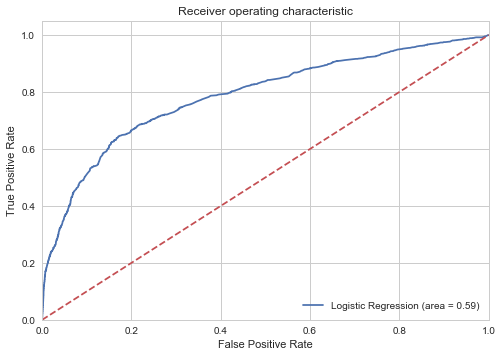

In [32]:


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

